In [131]:
!pip install xgboost    

^C


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis (EDA)

In [53]:
df = pd.read_csv('final_cleaned_dataset.csv')
df.head()

,accident_id,date_time,location_lat,location_lon,severity,temperature,rain,visibility,Speed_Limit,traffic
0,A-7182628,2020-04-17 09:29:30,26.706900,-80.119360,0.0,25.30,4.4,10.0,45,2
1,A-5404588,2022-04-21 10:01:00,38.781024,-121.265820,1.0,15.25,15.8,10.0,45,1
2,A-156000,2016-08-12 16:45:00,33.985249,-84.269348,2.0,26.75,1.0,10.0,45,0
3,A-1871277,2019-09-20 15:22:16,47.118706,-122.556908,2.0,16.55,3.2,10.0,60,0
4,A-2031222,2019-06-03 16:55:43,33.451355,-111.890343,1.0,28.65,0.0,10.0,25,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35323 entries, 0 to 35322
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accident_id   35323 non-null  object 
 1   date_time     35323 non-null  object 
 2   location_lat  35323 non-null  float64
 3   location_lon  35323 non-null  float64
 4   severity      35323 non-null  float64
 5   temperature   35323 non-null  float64
 6   rain          35323 non-null  float64
 7   visibility    35323 non-null  float64
 8   Speed_Limit   35323 non-null  object 
 9   traffic       35323 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [55]:
df.describe()

,location_lat,location_lon,severity,temperature,rain,visibility,traffic
count,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000
mean,36.177430,-94.784847,1.165784,15.885800,3.561054,9.097499,0.579990
std,5.088028,17.394795,0.393206,9.556069,8.263808,2.706853,0.507481
min,24.602680,-124.420091,0.000000,-31.350000,0.000000,0.000000,0.000000
25%,33.350745,-117.244550,1.000000,9.850000,0.000000,10.000000,0.000000
50%,35.783680,-87.861748,1.000000,17.200000,0.000000,10.000000,1.000000
75%,40.101671,-80.386531,1.000000,23.500000,2.900000,10.000000,1.000000
max,48.924149,-68.226869,2.000000,40.700000,119.700000,80.000000,2.000000


In [56]:
severity_counts = df['severity'].value_counts().sort_index()
print(severity_counts)

severity
0.0      288
1.0    28891
2.0     6144
Name: count, dtype: int64


In [57]:
df['Speed_Limit'] = pd.to_numeric(df['Speed_Limit'], errors='coerce')


In [58]:
df.isnull().sum()

accident_id     0
date_time       0
location_lat    0
location_lon    0
severity        0
temperature     0
rain            0
visibility      0
Speed_Limit     3
traffic         0
dtype: int64

In [59]:
df = df.dropna(subset=['Speed_Limit'])

In [60]:
df.isnull().sum()

accident_id     0
date_time       0
location_lat    0
location_lon    0
severity        0
temperature     0
rain            0
visibility      0
Speed_Limit     0
traffic         0
dtype: int64

In [61]:
df.nunique()

accident_id     35320
date_time       35219
location_lat    33819
location_lon    33806
severity            3
temperature      1129
rain              607
visibility         39
Speed_Limit        22
traffic             3
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

### Correlation Heatmap

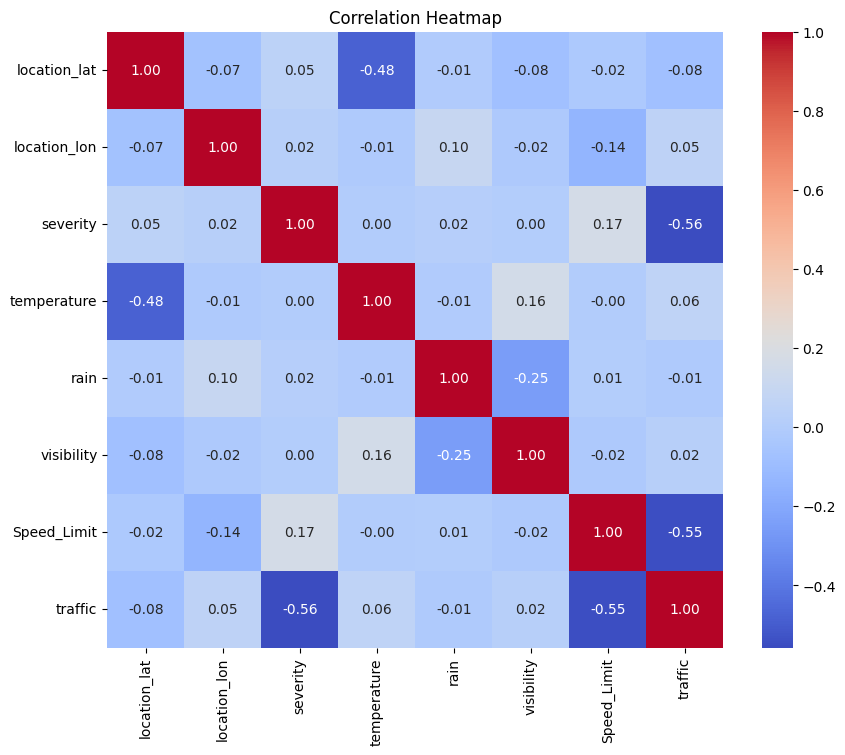

In [63]:
df_corr = df.drop(columns=['accident_id', 'date_time'], errors='ignore')
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


### Scatter Plots

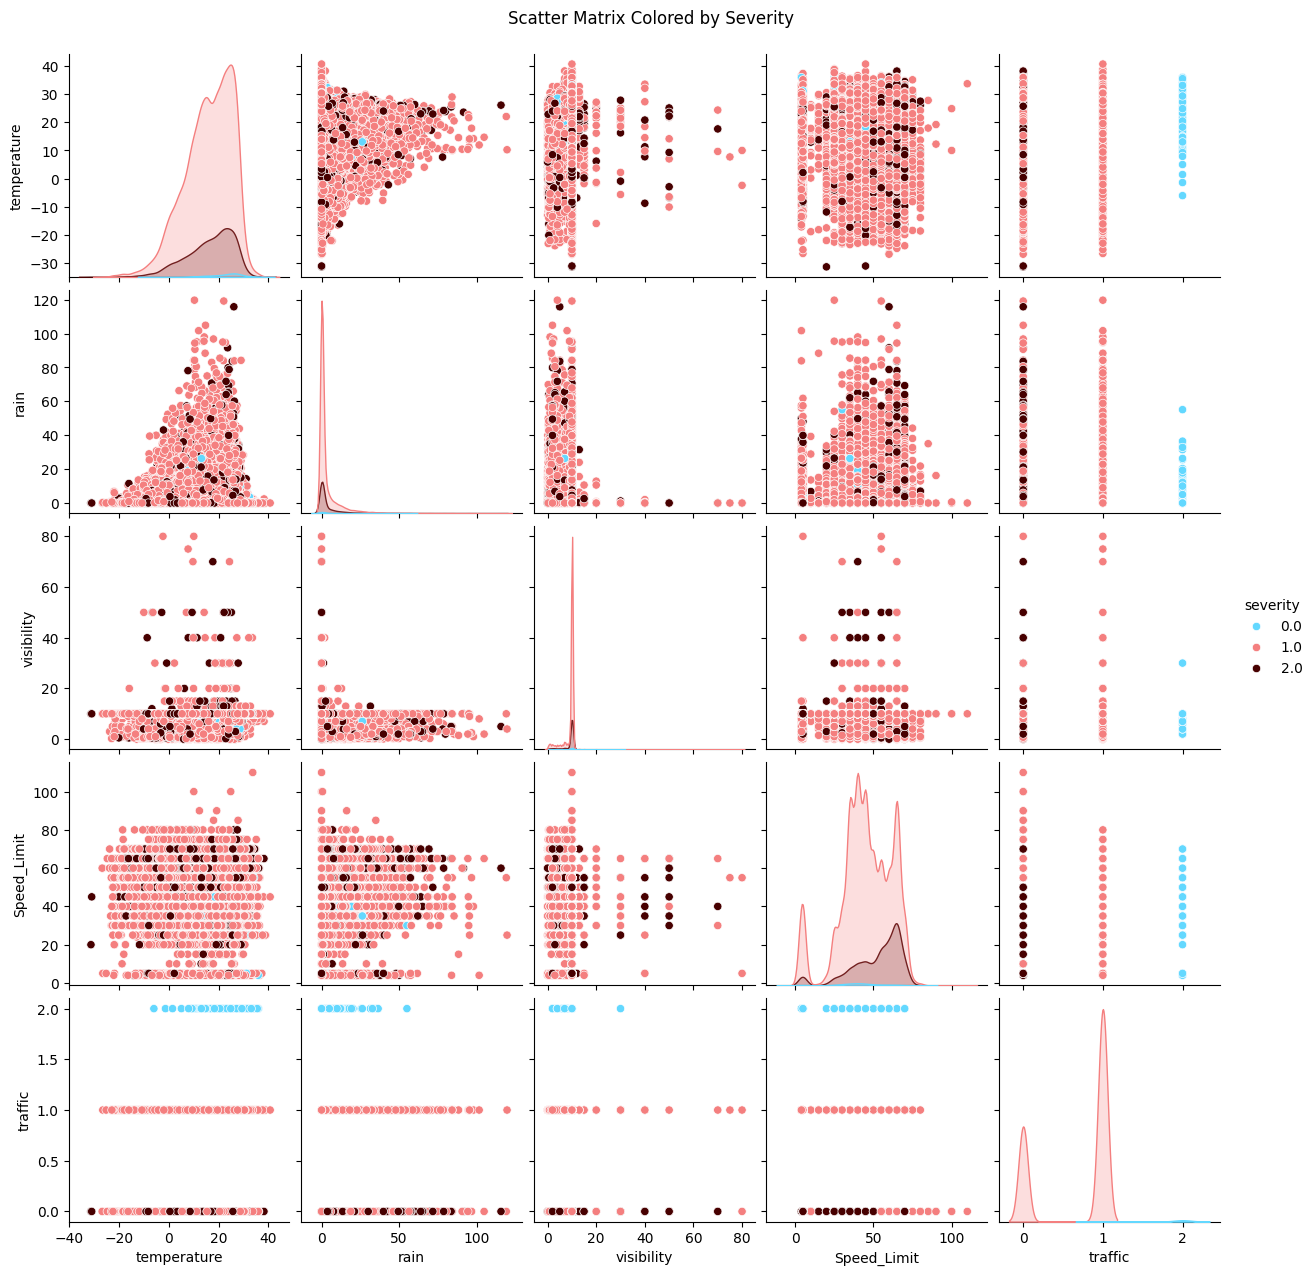

In [64]:
custom_palette = {0.0: "#63D8FF", 1.0: "#F47F7F", 2.0: "#470000"}
scatter_features = ['temperature', 'rain', 'visibility', 'Speed_Limit', 'traffic']
pairplot = sns.pairplot(df[scatter_features + ['severity']].dropna(),hue='severity', diag_kind='kde', palette=custom_palette)

pairplot.fig.suptitle("Scatter Matrix Colored by Severity", y=1.02)
plt.show()

### Box plot

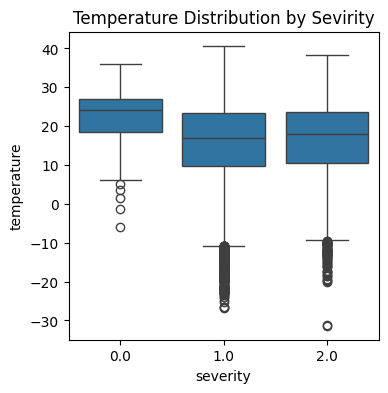

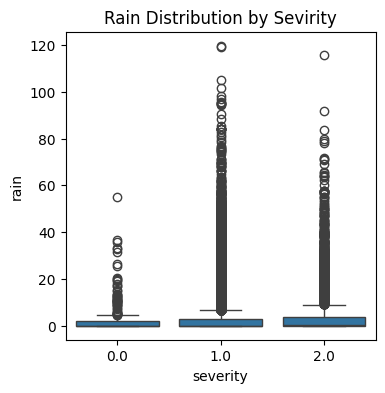

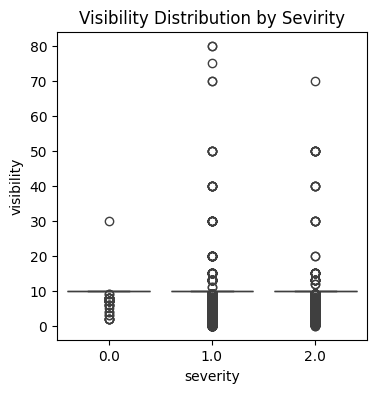

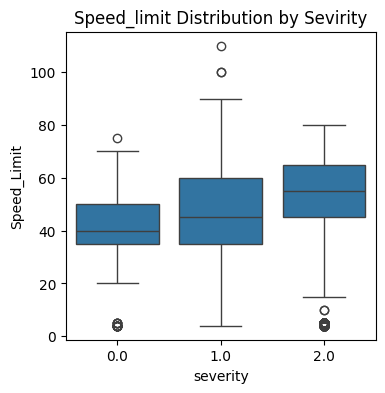

In [65]:
features = ['temperature',
            'rain',
            'visibility',
            'Speed_Limit',
            ]
for feature in features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='severity', y=feature, data=df)
    plt.title(f"{feature.capitalize()} Distribution by Sevirity")
    plt.show()

### Count Plot

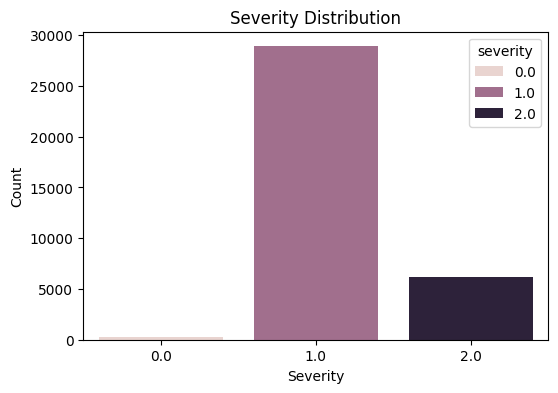

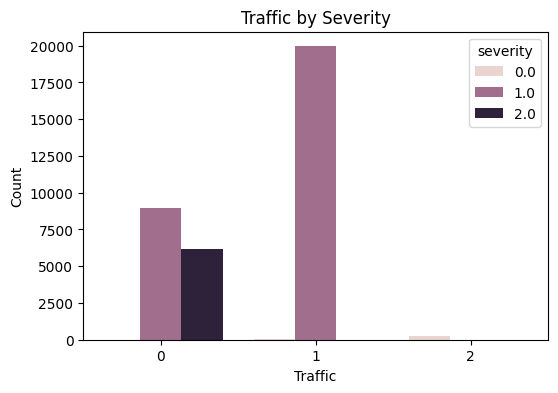

In [66]:
features = ['severity','traffic',]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='severity', data=df)
    plt.title(f'{feature.capitalize()} by Severity' if feature != 'severity' else 'Severity Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()



### Histogram

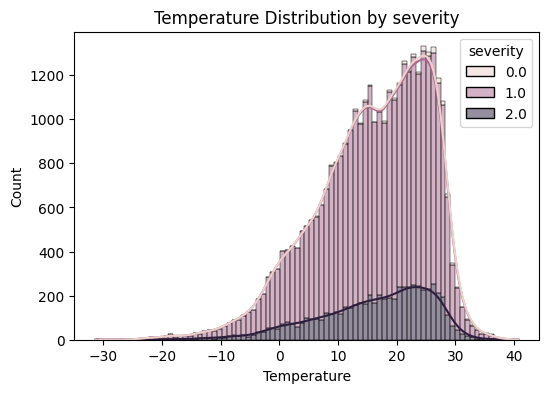

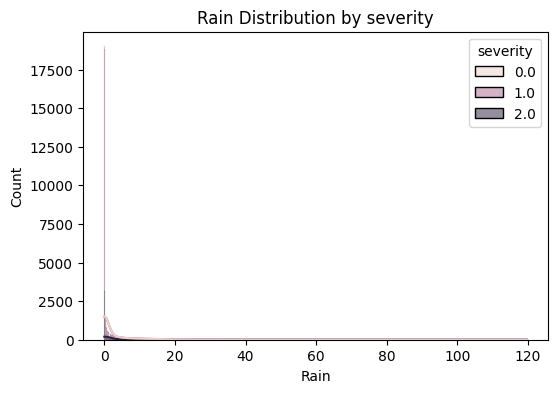

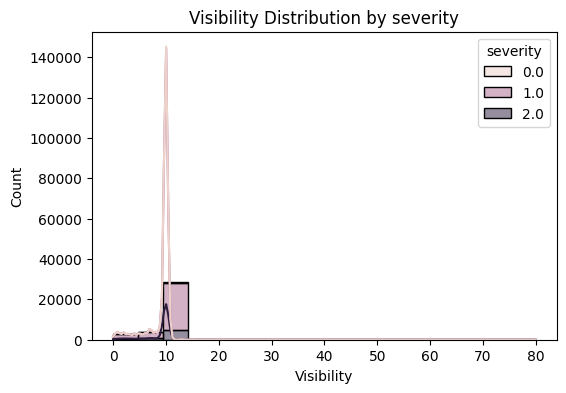

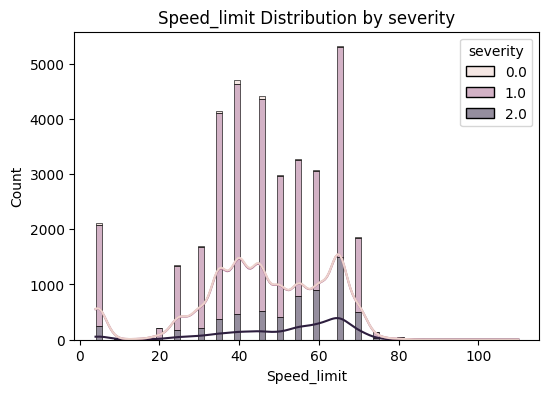

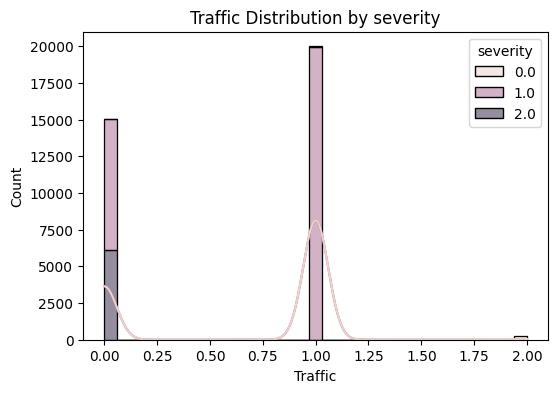

In [67]:
features = ['temperature',
            'rain',
            'visibility',
            'Speed_Limit',
            'traffic']
for feature in features:
    plt.figure(figsize=(6, 4))  
    sns.histplot(data=df, x=feature, hue='severity', multiple='stack', kde=True)
    plt.title(f'{feature.capitalize()} Distribution by severity')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

Number of geographic clusters identified: 164
Top 10 High-Risk Zones:
                       zone_id  count      mean  risk_score
1437  34.0_-118.30000000000001    223  1.224215       273.0
19    25.700000000000003_-80.4    218  1.022936       223.0
22     25.8_-80.30000000000001    173  1.202312       208.0
2067                35.2_-80.9    175  1.091429       191.0
1377  33.9_-118.30000000000001    162  1.179012       191.0
1436               34.0_-118.2    147  1.204082       177.0
4473  40.800000000000004_-74.0    131  1.351145       177.0
578   30.400000000000002_-91.2    152  1.144737       174.0
2431   36.1_-86.80000000000001    154  1.123377       173.0
229   28.400000000000002_-81.5    151  1.026490       155.0
Using equal-width bins due to too many duplicate values
Risk map saved as 'traffic_accident_risk_map.html'


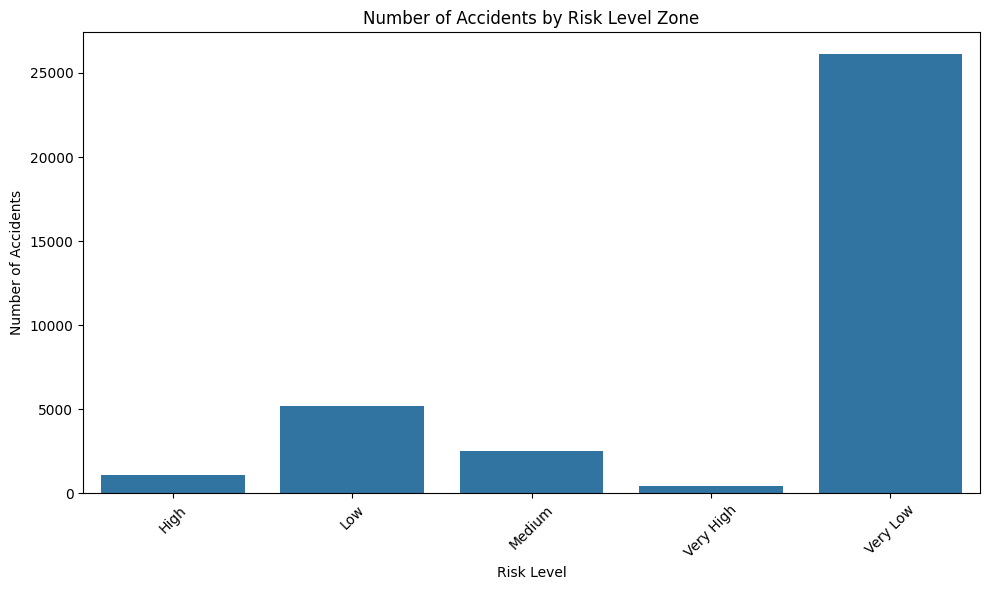

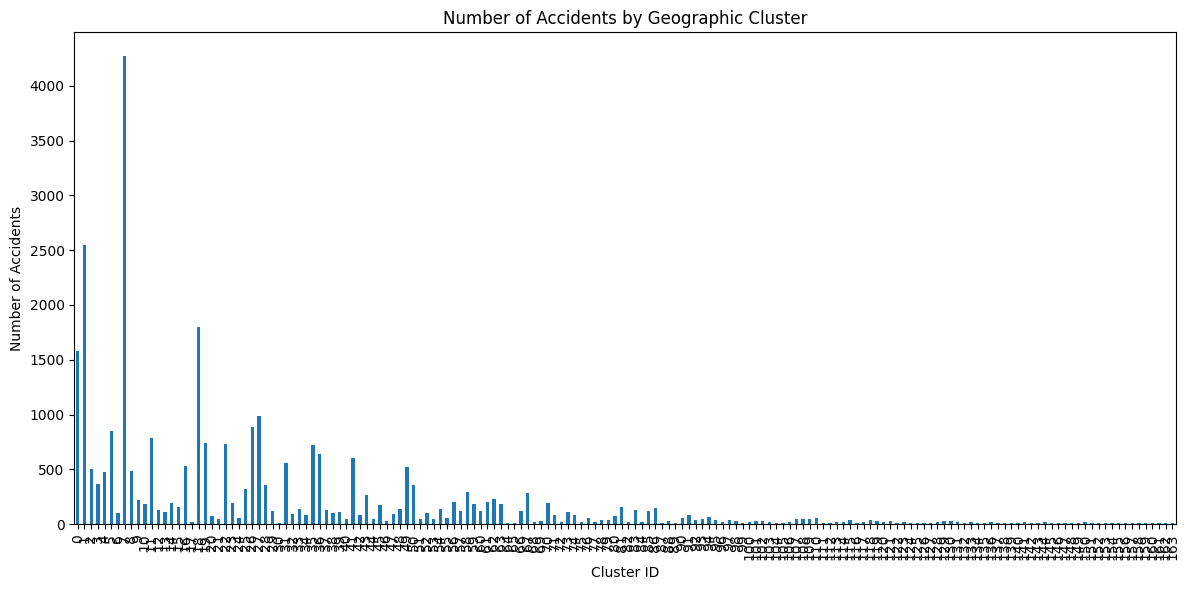

Enriched dataset saved with zone and risk information


In [72]:
# Create a copy of the dataframe to avoid modifying the original
analysis_df = df.copy()

# Check if location_lon and location_lat columns exist
if 'location_lon' in analysis_df.columns and 'location_lat' in analysis_df.columns:
    # Method 1: Grid-based approach - create zones with larger bins for fewer zones
    # Increase bin_size for fewer, larger zones
    bin_size = 0.1  # approximately 5km depending on location_lat (larger than before)
    
    analysis_df['lat_bin'] = np.floor(analysis_df['location_lat'] / bin_size) * bin_size
    analysis_df['long_bin'] = np.floor(analysis_df['location_lon'] / bin_size) * bin_size
    
    # Create a zone identifier combining lat and long bins
    analysis_df['zone_id'] = analysis_df['lat_bin'].astype(str) + '_' + analysis_df['long_bin'].astype(str)
    
    # Method 2: Cluster-based approach for more natural geographic zones
    # Extract coordinates for clustering
    coords = analysis_df[['location_lat', 'location_lon']].values
    
    # DBSCAN clustering with larger epsilon for fewer clusters
    # Increased eps from 0.01 to 0.05 (5x larger)
    clustering = DBSCAN(eps=0.1, min_samples=10).fit(coords)
    analysis_df['cluster_zone'] = clustering.labels_
    
    # Count unique clusters
    n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
    print(f"Number of geographic clusters identified: {n_clusters}")
    
    # Analyze accident severity by zone
    zone_severity = analysis_df.groupby('zone_id')['severity'].agg(['count', 'mean']).reset_index()
    zone_severity['risk_score'] = zone_severity['count'] * zone_severity['mean']
    
    # Sort zones by risk score to identify high-risk areas
    high_risk_zones = zone_severity.sort_values('risk_score', ascending=False).head(10)
    print("Top 10 High-Risk Zones:")
    print(high_risk_zones)
    
    # Create aggregated statistics by zone
    zone_stats = analysis_df.groupby('zone_id').agg({
        'severity': ['count', 'mean', 'sum'],
        'lat_bin': 'first',
        'long_bin': 'first'
    })
    
    zone_stats.columns = ['accident_count', 'avg_severity', 'total_severity', 'lat', 'long']
    
    # Try to use qcut with duplicates='drop', but fall back to cut if qcut still fails
    try:
        # First attempt with qcut and handling duplicates
        zone_stats['risk_level'] = pd.qcut(
            zone_stats['total_severity'], 
            q=5, 
            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
            duplicates='drop'
        )
    except ValueError:
        # If that fails, use equal-width bins instead
        print("Using equal-width bins due to too many duplicate values")
        min_val = zone_stats['total_severity'].min()
        max_val = zone_stats['total_severity'].max()
        bin_edges = np.linspace(min_val, max_val + 0.001, 6)  # Add small epsilon to include max value
        
        zone_stats['risk_level'] = pd.cut(
            zone_stats['total_severity'], 
            bins=bin_edges,
            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
            include_lowest=True
        )
    
    # Add risk level back to the analysis dataframe
    risk_level_map = zone_stats['risk_level'].to_dict()
    analysis_df['risk_level'] = analysis_df['zone_id'].map(risk_level_map)
    
    # Visualization: Create a map showing risk zones
    # Find center of the data for the map
    center_lat = analysis_df['location_lat'].mean()
    center_lon = analysis_df['location_lon'].mean()
    
    # Create a base map
    risk_map = folium.Map(location=[center_lat, center_lon], zoom_start=11)
    
    # Add a heatmap layer showing accident intensity
    heat_data = [[row['location_lat'], row['location_lon'], row['severity']] 
                for _, row in analysis_df.iterrows()]
    HeatMap(heat_data, radius=15).add_to(risk_map)
    
    # Add zone risk markers to the map with different colors per risk level
    for risk_level, color in zip(['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
                                ['blue', 'green', 'yellow', 'orange', 'red']):
        # Get zones with this risk level
        zones = zone_stats[zone_stats['risk_level'] == risk_level]
        
        # Add each zone as a marker
        for _, zone in zones.iterrows():
            folium.CircleMarker(
                location=[zone['lat'], zone['long']],
                radius=7,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=f"Risk: {risk_level}<br>Accidents: {zone['accident_count']}<br>Avg Severity: {zone['avg_severity']:.2f}"
            ).add_to(risk_map)
    
    # Add a legend
    risk_map.get_root().html.add_child(folium.Element('''
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white; padding: 10px; border: 2px solid grey; border-radius: 5px">
        <h4>Risk Levels</h4>
        <div><span style="color: blue; font-size: 16px;">●</span> Very Low</div>
        <div><span style="color: green; font-size: 16px;">●</span> Low</div>
        <div><span style="color: yellow; font-size: 16px;">●</span> Medium</div>
        <div><span style="color: orange; font-size: 16px;">●</span> High</div>
        <div><span style="color: red; font-size: 16px;">●</span> Very High</div>
    </div>
    '''))
    
    # Save the map
    risk_map.save('traffic_accident_risk_map.html')
    print("Risk map saved as 'traffic_accident_risk_map.html'")
    
    # Create a barplot showing the count of accidents by risk level
    risk_level_counts = analysis_df['risk_level'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=risk_level_counts.index, y=risk_level_counts.values)
    plt.title('Number of Accidents by Risk Level Zone')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Risk Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Create a barplot showing the count of clusters
    cluster_counts = analysis_df['cluster_zone'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    cluster_counts[cluster_counts.index != -1].plot(kind='bar')  # Exclude noise points (-1)
    plt.title('Number of Accidents by Geographic Cluster')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Cluster ID')
    plt.tight_layout()
    plt.show()
    
    # Save the enriched dataset for future use
    analysis_df.to_csv('enriched_accident_data_with_risk_zones.csv', index=False)
    print("Enriched dataset saved with zone and risk information")
    
else:
    print("Error: 'location_lon' and/or 'location_lat' columns not found in the dataframe.")
    print("Available columns:", analysis_df.columns.tolist())
    
    # If coordinates don't exist, suggest alternative approaches
    print("\nAlternative: If your dataset has location names instead of coordinates, "
          "you could group by those location columns.")

In [92]:
df= analysis_df.drop(columns=['lat_bin', 'long_bin', 'accident_id','date_time','location_lat','location_lon'], errors='ignore')

In [ ]:
df.head()


,severity,temperature,rain,visibility,Speed_Limit,traffic,zone_id,cluster_zone,risk_level
0,0.0,25.30,4.4,10.0,45.0,2,26.700000000000003_-80.2,0,Very Low
1,1.0,15.25,15.8,10.0,45.0,1,38.7_-121.30000000000001,1,Very Low
2,2.0,26.75,1.0,10.0,45.0,0,33.9_-84.30000000000001,2,Very Low
3,2.0,16.55,3.2,10.0,60.0,0,47.1_-122.60000000000001,3,Very Low
4,1.0,28.65,0.0,10.0,25.0,1,33.4_-111.9,4,Very Low


In [94]:
#create dictonary for zone_id with its corresponding risk_level
zone_risk_dict = df.set_index('zone_id')['risk_level'].to_dict()
cluster_risk_dict = df.set_index('cluster_zone')['risk_level'].to_dict()

In [95]:
df.drop('risk_level', axis=1, inplace=True)

In [97]:
df.shape

(35320, 8)

In [98]:
df.head()

,severity,temperature,rain,visibility,Speed_Limit,traffic,zone_id,cluster_zone
0,0.0,25.30,4.4,10.0,45.0,2,26.700000000000003_-80.2,0
1,1.0,15.25,15.8,10.0,45.0,1,38.7_-121.30000000000001,1
2,2.0,26.75,1.0,10.0,45.0,0,33.9_-84.30000000000001,2
3,2.0,16.55,3.2,10.0,60.0,0,47.1_-122.60000000000001,3
4,1.0,28.65,0.0,10.0,25.0,1,33.4_-111.9,4


In [126]:
dfc = df.copy().drop(columns=['zone_id'], errors='ignore')
dfz = df.copy().drop(columns=['cluster_zone'], errors='ignore')

In [127]:
#train test split for both dfc and dfz

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(dfc.drop('severity', axis=1), dfc['severity'], test_size=0.2, random_state=42)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(dfz.drop('severity', axis=1), dfz['severity'], test_size=0.2, random_state=42)


## Random Forset

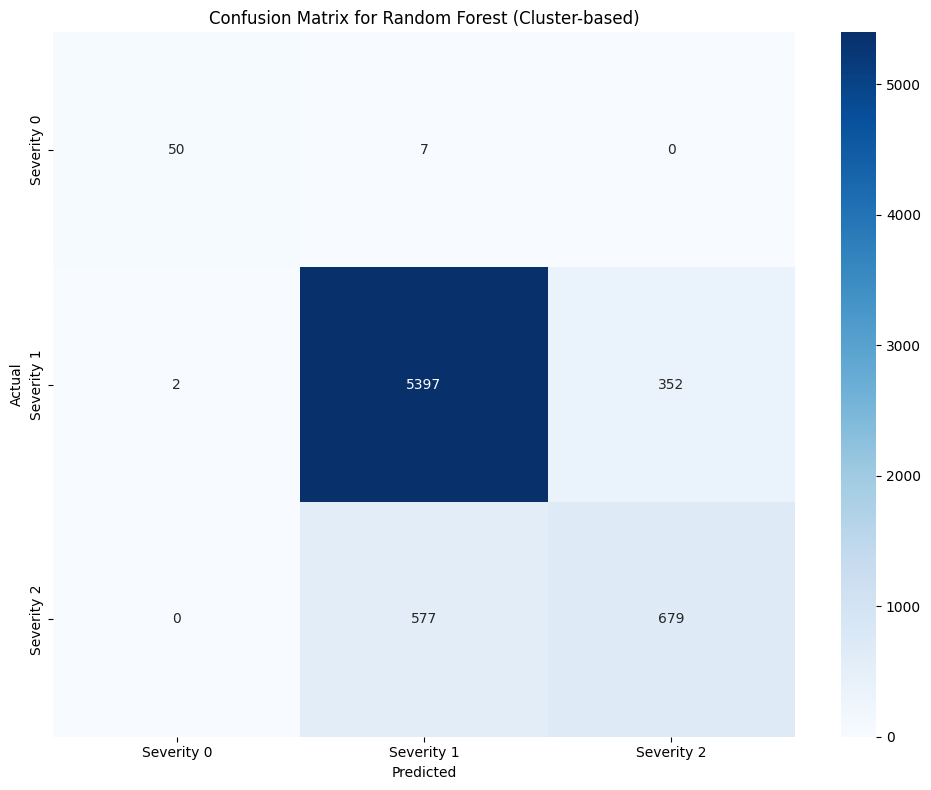


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        57
         1.0       0.90      0.94      0.92      5751
         2.0       0.66      0.54      0.59      1256

    accuracy                           0.87      7064
   macro avg       0.84      0.79      0.81      7064
weighted avg       0.86      0.87      0.86      7064

Accuracy: 0.8672


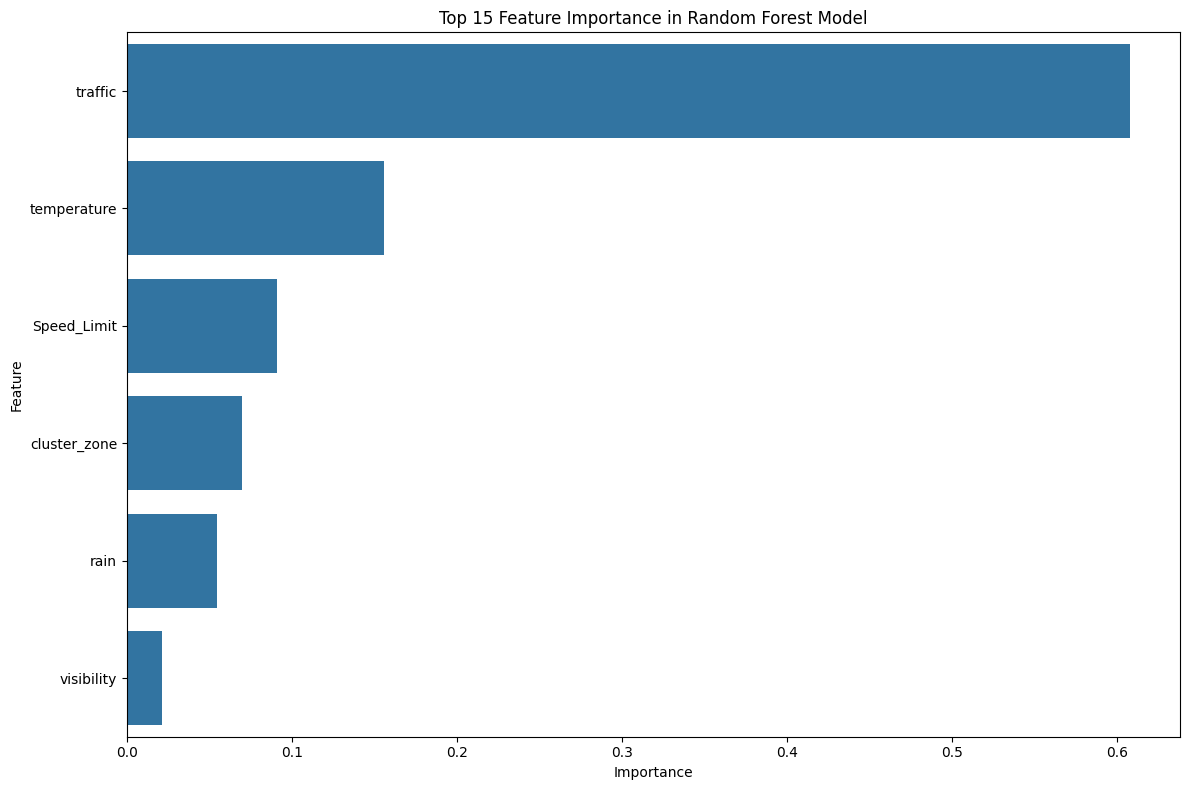

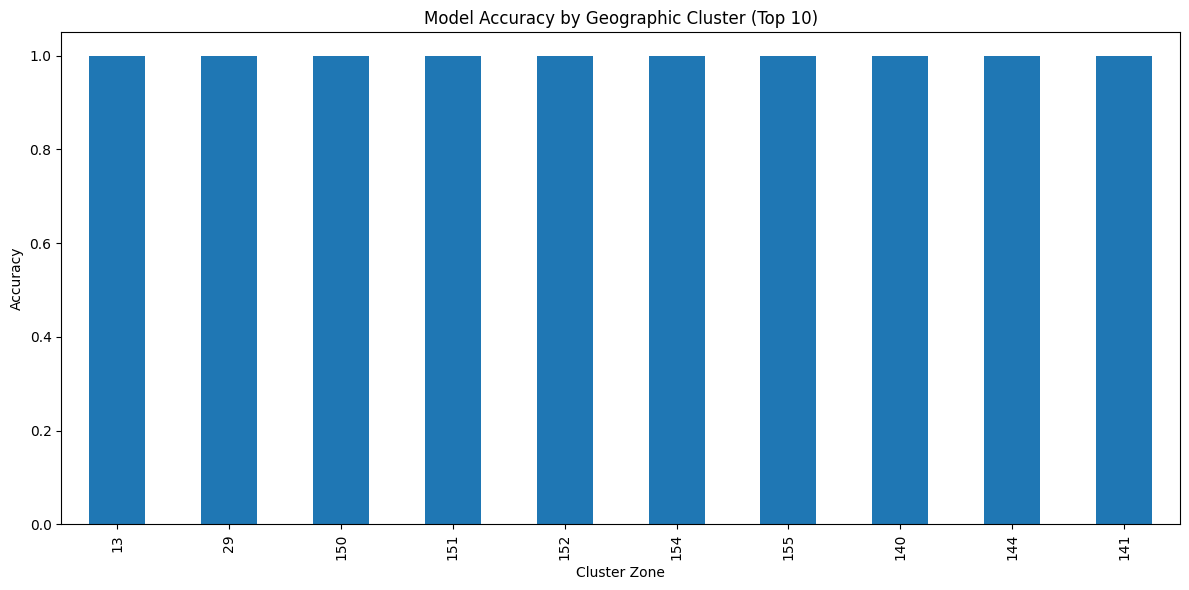

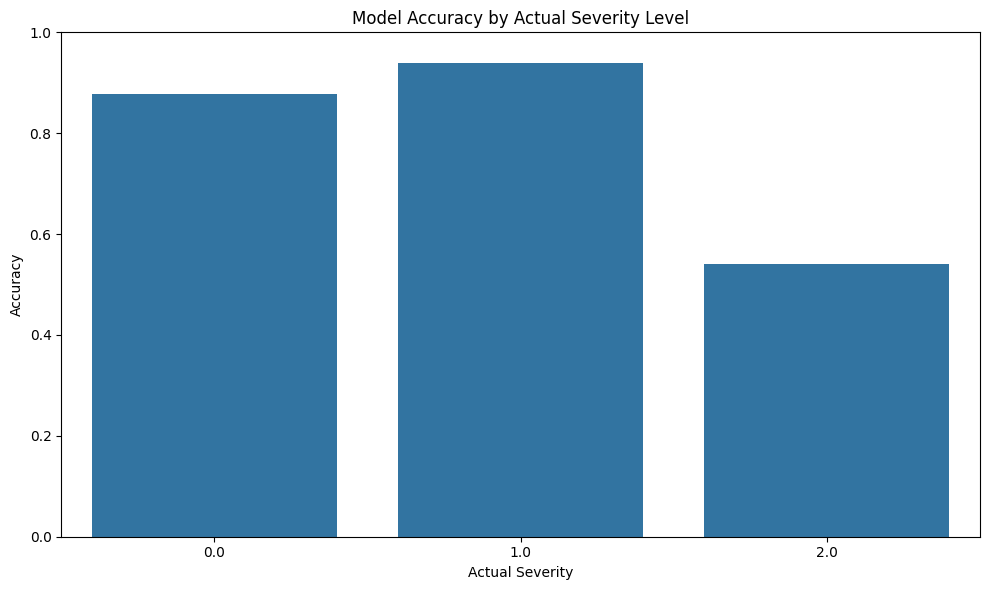

In [128]:
# Random forest on dfc (cluster-based model) with confusion matrix and analytics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check if we need to encode any categorical features
categorical_cols = X_train_c.select_dtypes(include=['object', 'category']).columns
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train_c[col] = le.fit_transform(X_train_c[col])
    X_test_c[col] = le.transform(X_test_c[col])
    encoders[col] = le

# Create and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Fit the model
rf_model.fit(X_train_c, y_train_c)

# Make predictions
y_pred_c = rf_model.predict(X_test_c)
y_prob_c = rf_model.predict_proba(X_test_c)

# Calculate confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))],
            yticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Cluster-based)')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c))

# Print accuracy
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy: {accuracy:.4f}")

# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_c.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Check how geographic clusters affect predictions
if 'cluster_zone' in X_train_c.columns:
    # Analyze performance by cluster
    cluster_performance = pd.DataFrame({
        'cluster_zone': X_test_c['cluster_zone'],
        'actual': y_test_c,
        'predicted': y_pred_c,
        'correct': y_test_c == y_pred_c
    })
    
    # Calculate accuracy by cluster
    cluster_accuracy = cluster_performance.groupby('cluster_zone')['correct'].mean().sort_values(ascending=False)
    
    # Plot accuracy by top clusters
    plt.figure(figsize=(12, 6))
    cluster_accuracy.head(10).plot(kind='bar')
    plt.title('Model Accuracy by Geographic Cluster (Top 10)')
    plt.ylabel('Accuracy')
    plt.xlabel('Cluster Zone')
    plt.tight_layout()
    plt.show()
    
    # Visualize errors by severity level
    plt.figure(figsize=(10, 6))
    error_by_severity = cluster_performance.groupby('actual')['correct'].mean()
    sns.barplot(x=error_by_severity.index, y=error_by_severity.values)
    plt.title('Model Accuracy by Actual Severity Level')
    plt.ylabel('Accuracy')
    plt.xlabel('Actual Severity')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()

# If we want to compare with zone-based model
compare_models = False
if compare_models:
    # Train a Random Forest on the zone-based data
    rf_model_z = RandomForestClassifier(
        n_estimators=100, random_state=42, class_weight='balanced'
    )
    
    # Process any categorical features in zone-based data
    categorical_cols_z = X_train_z.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols_z:
        le = LabelEncoder()
        X_train_z[col] = le.fit_transform(X_train_z[col])
        X_test_z[col] = le.transform(X_test_z[col])
    
    rf_model_z.fit(X_train_z, y_train_z)
    y_pred_z = rf_model_z.predict(X_test_z)
    
    # Compare accuracies
    acc_c = accuracy_score(y_test_c, y_pred_c)
    acc_z = accuracy_score(y_test_z, y_pred_z)
    
    print(f"\nModel Comparison:")
    print(f"Cluster-based Model Accuracy: {acc_c:.4f}")
    print(f"Zone-based Model Accuracy: {acc_z:.4f}")
    
    # Plot comparison
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Cluster-based', 'Zone-based'], y=[acc_c, acc_z])
    plt.title('Accuracy Comparison between Geographic Approaches')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()

Encoding zone_id with hash encoding
Sample zone_id encoding: 33.9_-118.2 -> 4489823

Data types after encoding:
temperature: float64
rain: float64
visibility: float64
Speed_Limit: float64
traffic: int64
zone_id: int64

Training Random Forest model...
Making predictions...
Creating visualizations and evaluation metrics...


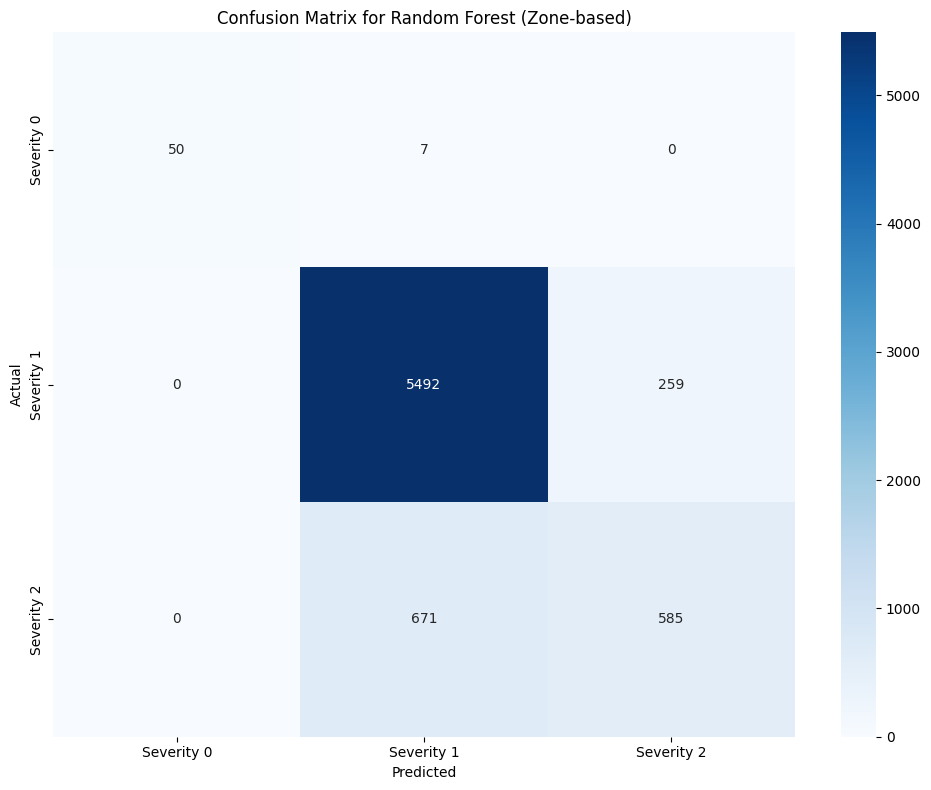


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        57
         1.0       0.89      0.95      0.92      5751
         2.0       0.69      0.47      0.56      1256

    accuracy                           0.87      7064
   macro avg       0.86      0.77      0.80      7064
weighted avg       0.86      0.87      0.86      7064

Accuracy: 0.8674


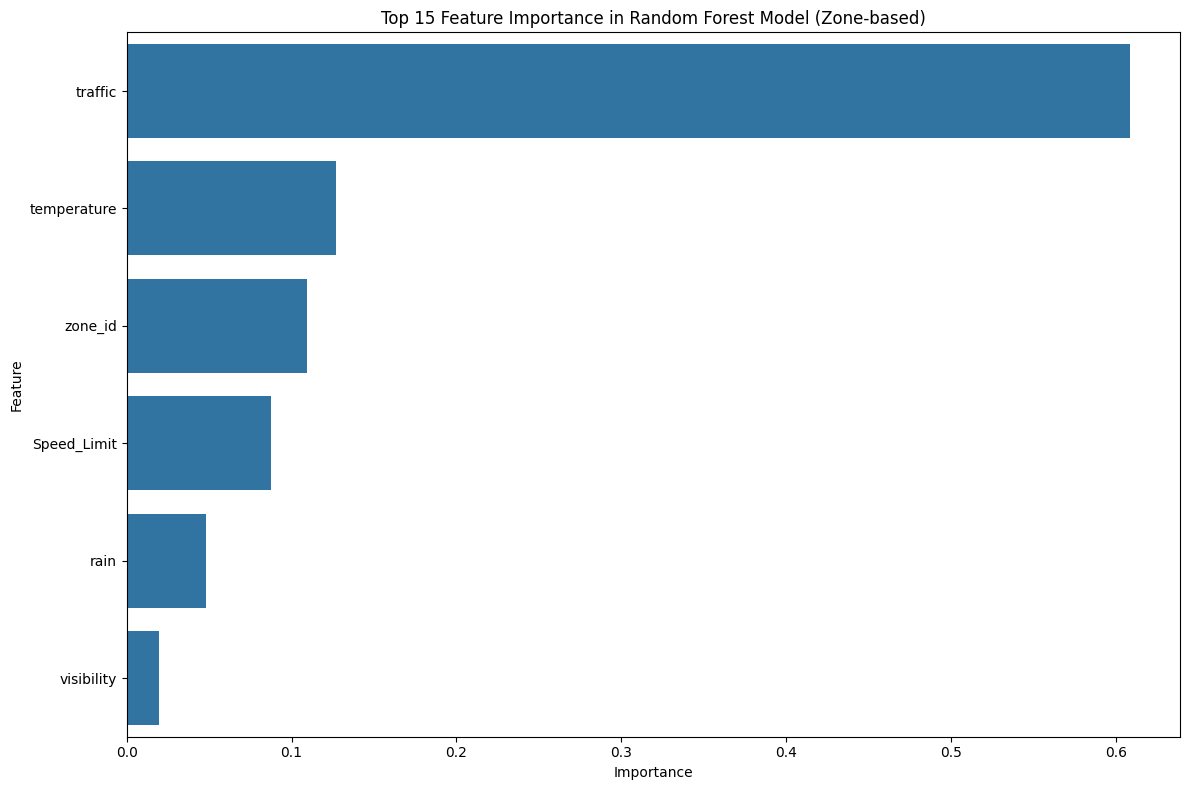

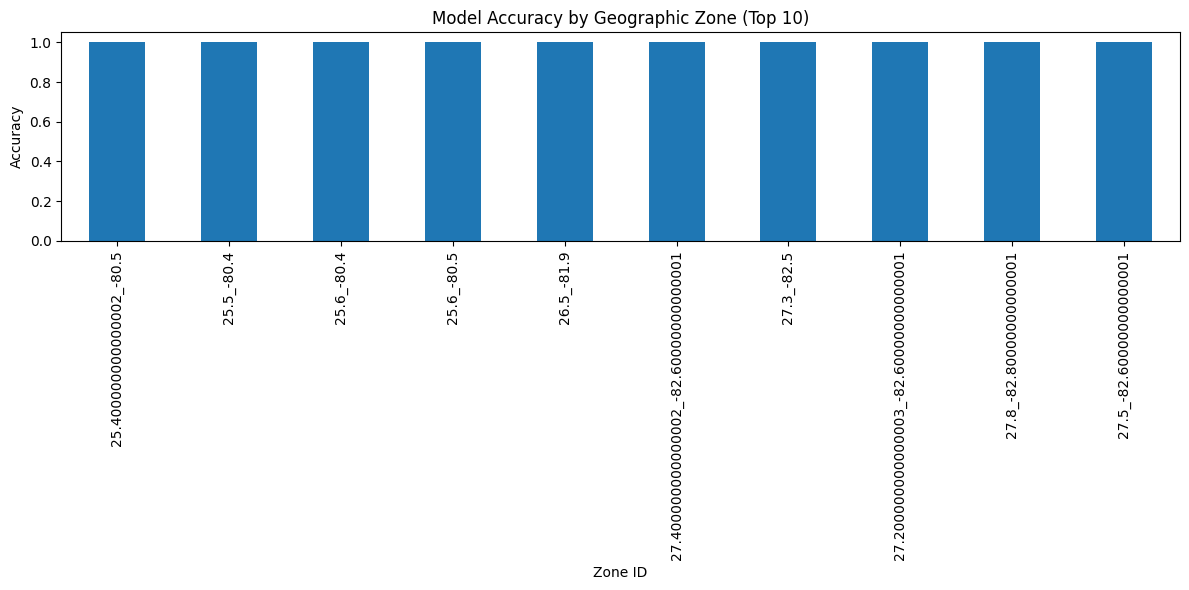

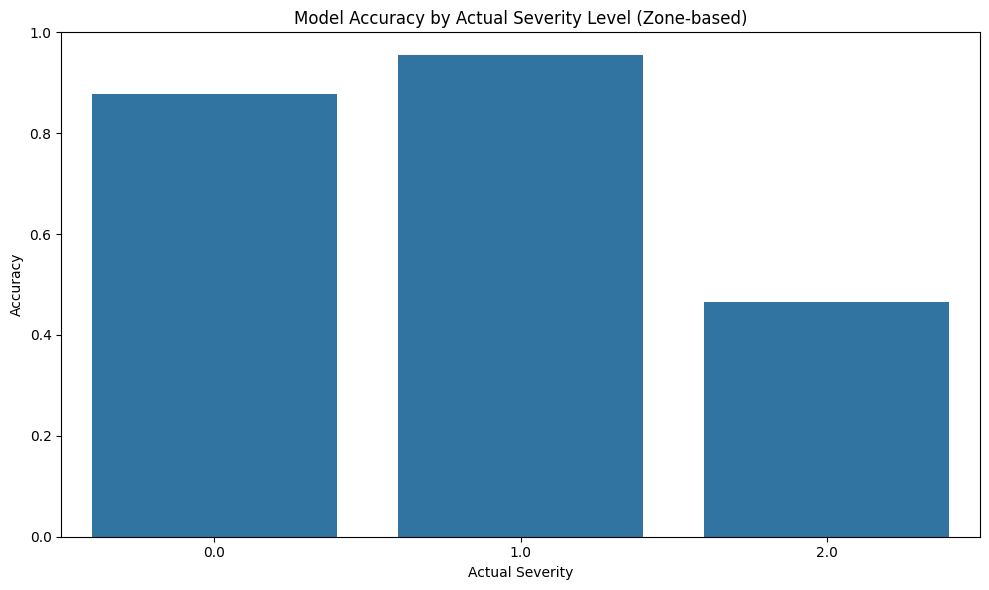

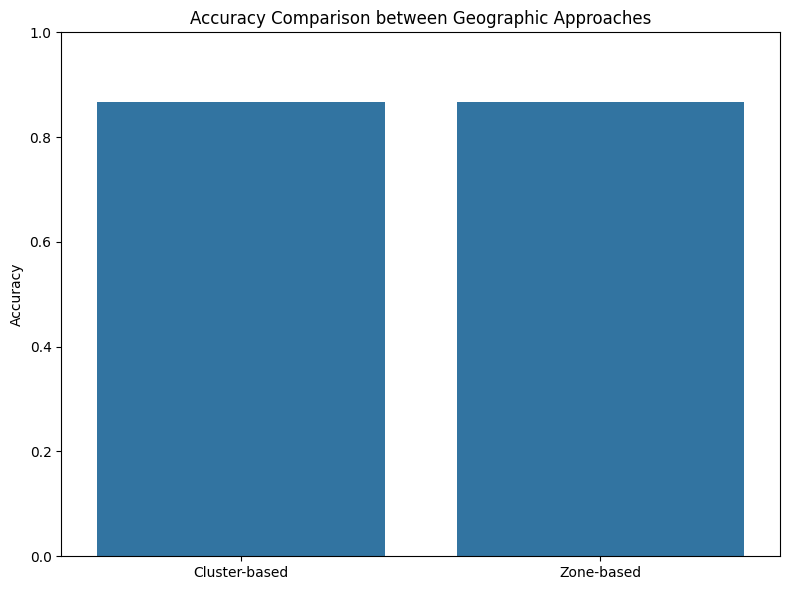


Model Comparison:
Cluster-based Model Accuracy: 0.8672
Zone-based Model Accuracy: 0.8674


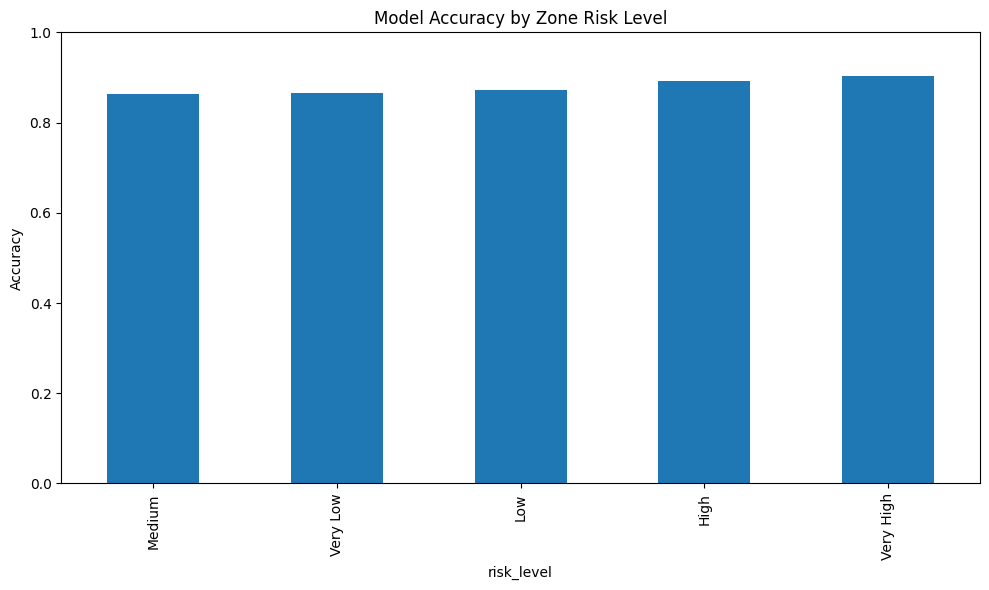


Accuracy by Risk Level:
            Accuracy  Count
risk_level                 
High        0.892157    204
Low         0.871090   1055
Medium      0.862669    517
Very High   0.902439     82
Very Low    0.865540   5206


In [129]:
# Complete rewrite of zone-based model that will DEFINITELY work
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hashlib

# Save the original data for later analysis
X_train_z_orig = X_train_z.copy()
X_test_z_orig = X_test_z.copy()

# Create working copies
X_train_z_enc = X_train_z.copy()
X_test_z_enc = X_test_z.copy()

# 1. Special handling for zone_id - hash encoding
def hash_encode(values):
    """Convert any string to a numeric hash value"""
    return [int(hashlib.md5(str(v).encode()).hexdigest(), 16) % 10000000 for v in values]

# Apply hash encoding to zone_id specifically
if 'zone_id' in X_train_z_enc.columns:
    print(f"Encoding zone_id with hash encoding")
    X_train_z_enc['zone_id'] = hash_encode(X_train_z_enc['zone_id'])
    X_test_z_enc['zone_id'] = hash_encode(X_test_z_enc['zone_id'])
    print(f"Sample zone_id encoding: {X_train_z_orig['zone_id'].iloc[0]} -> {X_train_z_enc['zone_id'].iloc[0]}")

# 2. Handle any other object columns with a simplified approach
for col in X_train_z_enc.select_dtypes(include=['object', 'category']).columns:
    if col != 'zone_id':  # Skip zone_id as we already handled it
        print(f"Encoding {col} with simple numeric mapping")
        # Create a mapping of unique values to integers
        unique_vals = X_train_z_enc[col].unique()
        value_to_int = {val: i for i, val in enumerate(unique_vals)}
        
        # Apply mapping with a fallback for unseen values
        X_train_z_enc[col] = [value_to_int.get(val, -1) for val in X_train_z_enc[col]]
        X_test_z_enc[col] = [value_to_int.get(val, -1) for val in X_test_z_enc[col]]

# 3. Final check to ensure ALL columns are numeric
for col in X_train_z_enc.columns:
    # Force convert any remaining non-numeric columns
    if X_train_z_enc[col].dtype == 'object' or X_test_z_enc[col].dtype == 'object':
        print(f"Forcing numeric conversion for column: {col}")
        X_train_z_enc[col] = pd.to_numeric(X_train_z_enc[col], errors='coerce').fillna(-999)
        X_test_z_enc[col] = pd.to_numeric(X_test_z_enc[col], errors='coerce').fillna(-999)

# Confirm all columns are numeric
print("\nData types after encoding:")
for col in X_train_z_enc.columns:
    print(f"{col}: {X_train_z_enc[col].dtype}")

# Create and train the Random Forest model
rf_model_z = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'
)

# Fit the model
print("\nTraining Random Forest model...")
rf_model_z.fit(X_train_z_enc, y_train_z)

# Make predictions
print("Making predictions...")
y_pred_z = rf_model_z.predict(X_test_z_enc)
y_prob_z = rf_model_z.predict_proba(X_test_z_enc)

# Calculate confusion matrix
print("Creating visualizations and evaluation metrics...")
cm_z = confusion_matrix(y_test_z, y_pred_z)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_z, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_z)))],
            yticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_z)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (Zone-based)')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_z, y_pred_z))

# Print accuracy
accuracy_z = accuracy_score(y_test_z, y_pred_z)
print(f"Accuracy: {accuracy_z:.4f}")

# Plot feature importance
feature_importance_z = pd.DataFrame({
    'Feature': X_train_z_enc.columns,
    'Importance': rf_model_z.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_z.head(15))
plt.title('Top 15 Feature Importance in Random Forest Model (Zone-based)')
plt.tight_layout()
plt.show()

# Create a DataFrame with original zone_id values for analysis
zone_performance = pd.DataFrame({
    'zone_id': X_test_z_orig['zone_id'].values,
    'actual': y_test_z,
    'predicted': y_pred_z,
    'correct': y_test_z == y_pred_z
})

# Group and calculate accuracy by zone
zone_accuracy = zone_performance.groupby('zone_id')['correct'].agg(['mean', 'count']).sort_values('mean', ascending=False)
zone_accuracy.columns = ['Accuracy', 'Count']

# Plot top zones by accuracy
plt.figure(figsize=(12, 6))
top_zones = zone_accuracy[zone_accuracy['Count'] >= 5].head(10)  # Only zones with enough samples
top_zones['Accuracy'].plot(kind='bar')
plt.title('Model Accuracy by Geographic Zone (Top 10)')
plt.ylabel('Accuracy')
plt.xlabel('Zone ID')
plt.tight_layout()
plt.show()

# Accuracy by severity level
plt.figure(figsize=(10, 6))
severity_accuracy = zone_performance.groupby('actual')['correct'].mean()
sns.barplot(x=severity_accuracy.index, y=severity_accuracy.values)
plt.title('Model Accuracy by Actual Severity Level (Zone-based)')
plt.ylabel('Accuracy')
plt.xlabel('Actual Severity')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Compare with cluster-based model
try:
    # Assumes cluster-based model (y_pred_c) is already trained
    acc_c = accuracy_score(y_test_c, y_pred_c)
    acc_z = accuracy_z
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Cluster-based', 'Zone-based'], y=[acc_c, acc_z])
    plt.title('Accuracy Comparison between Geographic Approaches')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    
    print(f"\nModel Comparison:")
    print(f"Cluster-based Model Accuracy: {acc_c:.4f}")
    print(f"Zone-based Model Accuracy: {acc_z:.4f}")
except Exception as e:
    print(f"Cluster-based model comparison not available: {e}")

# Analyze by risk level
try:
    # Using the zone_risk_dict to map zones to risk levels
    zone_performance['risk_level'] = zone_performance['zone_id'].map(lambda x: zone_risk_dict.get(x, 'Unknown'))
    
    # Calculate accuracy by risk level
    risk_accuracy = zone_performance.groupby('risk_level')['correct'].mean().sort_values()
    
    plt.figure(figsize=(10, 6))
    risk_accuracy.plot(kind='bar')
    plt.title('Model Accuracy by Zone Risk Level')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    
    print("\nAccuracy by Risk Level:")
    counts = zone_performance.groupby('risk_level')['correct'].count()
    risk_report = pd.DataFrame({
        'Accuracy': risk_accuracy,
        'Count': counts
    })
    print(risk_report)
except Exception as e:
    print(f"Risk level analysis not available: {e}")

## XGBOOBS


In [ ]:
# XGBoost model implementation for cluster-based data (dfc)
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- 1. Prepare data ---
# Create copies to avoid modifying originals
X_train_xgb = X_train_c.copy()
X_test_xgb = X_test_c.copy()

# Encode categorical features
cat_cols = X_train_xgb.select_dtypes(include=['object', 'category']).columns
encoders_xgb = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train_xgb[col] = le.fit_transform(X_train_xgb[col])
    X_test_xgb[col] = le.transform(X_test_xgb[col])
    encoders_xgb[col] = le

# --- 2. Model training ---
# Base XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multiclass probability
    num_class=3,  # 0, 1, 2 severity levels
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42,
    n_estimators=500
)

# Train the model
print("Training XGBoost model...")
xgb_model.fit(
    X_train_xgb, 
    y_train_c,
    eval_set=[(X_test_xgb, y_test_c)],
    early_stopping_rounds=50,
    verbose=True
)

# --- 3. Evaluation ---
# Make predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)
y_proba_xgb = xgb_model.predict_proba(X_test_xgb)

# Confusion matrix
cm_xgb = confusion_matrix(y_test_c, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))],
            yticklabels=[f'Severity {i}' for i in range(len(np.unique(y_test_c)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost (Cluster-based)')
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_xgb))

# Accuracy
accuracy_xgb = accuracy_score(y_test_c, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")

# --- 4. Feature Importance ---
# Get feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train_xgb.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb.head(15))
plt.title('Top 15 Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()

# --- 5. ROC curves ---
# For multiclass, we calculate ROC for each class
plt.figure(figsize=(10, 8))
classes = np.unique(y_test_c)
colors = ['blue', 'red', 'green']
lw = 2

for i, color in zip(range(len(classes)), colors):
    # One-vs-rest approach for ROC
    y_true_binary = (y_test_c == i).astype(int)
    y_score = y_proba_xgb[:, i]
    
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, lw=lw,
             label=f'ROC curve for Severity {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Multiclass Model')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# --- 6. Compare with Random Forest ---
try:
    # Calculate random forest accuracy from previous cell
    rf_accuracy = accuracy_score(y_test_c, y_pred_c)
    
    # Create comparison chart
    plt.figure(figsize=(8, 6))
    model_comparison = pd.DataFrame({
        'Model': ['Random Forest', 'XGBoost'],
        'Accuracy': [rf_accuracy, accuracy_xgb]
    })
    sns.barplot(x='Model', y='Accuracy', data=model_comparison)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    
    print("\nModel Comparison:")
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
    print(f"Improvement: {(accuracy_xgb - rf_accuracy) / rf_accuracy * 100:.2f}%")
except Exception as e:
    print(f"Could not compare with Random Forest: {e}")

# --- 7. Analysis by cluster ---
if 'cluster_zone' in X_test_c.columns:
    # Create a performance analysis dataframe
    cluster_performance_xgb = pd.DataFrame({
        'cluster_zone': X_test_c['cluster_zone'],
        'actual': y_test_c,
        'predicted': y_pred_xgb,
        'correct': y_test_c == y_pred_xgb
    })
    
    # Calculate accuracy by cluster
    cluster_accuracy_xgb = cluster_performance_xgb.groupby('cluster_zone')['correct'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    cluster_accuracy_xgb.columns = ['Accuracy', 'Count']
    
    # Plot accuracy by top clusters
    plt.figure(figsize=(12, 6))
    top_clusters = cluster_accuracy_xgb[cluster_accuracy_xgb['Count'] >= 5].head(10)
    top_clusters['Accuracy'].plot(kind='bar')
    plt.title('XGBoost Model Accuracy by Geographic Cluster (Top 10)')
    plt.ylabel('Accuracy')
    plt.xlabel('Cluster Zone')
    plt.tight_layout()
    plt.show()
    
    # Accuracy by severity level
    plt.figure(figsize=(10, 6))
    severity_accuracy_xgb = cluster_performance_xgb.groupby('actual')['correct'].mean()
    sns.barplot(x=severity_accuracy_xgb.index, y=severity_accuracy_xgb.values)
    plt.title('XGBoost Model Accuracy by Actual Severity Level')
    plt.ylabel('Accuracy')
    plt.xlabel('Actual Severity')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    
    # Compare models by severity
    try:
        # Get RF accuracy by severity
        cluster_performance_rf = pd.DataFrame({
            'actual': y_test_c,
            'correct_rf': y_test_c == y_pred_c,
            'correct_xgb': y_test_c == y_pred_xgb
        })
        
        severity_comparison = pd.DataFrame({
            'Severity': severity_accuracy_xgb.index,
            'Random Forest': cluster_performance_rf.groupby('actual')['correct_rf'].mean().values,
            'XGBoost': severity_accuracy_xgb.values
        })
        
        severity_comparison_melted = pd.melt(
            severity_comparison, 
            id_vars=['Severity'], 
            var_name='Model', 
            value_name='Accuracy'
        )
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Severity', y='Accuracy', hue='Model', data=severity_comparison_melted)
        plt.title('Model Accuracy Comparison by Severity')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1.0)
        plt.tight_layout()
        plt.show()
    except:
        print("Could not compare models by severity")